# Diabetes Prediction Analysis

The goal is to build a classification model that predicts whether a patient has diabetes (Outcome = 1) or not (Outcome = 0) based on various medical predictors. The dataset contains 768 records with 8 features and 1 target variable.

## Exploratory Data Analysis (EDA)

In [ ]:
# Data Loading and Initial Inspection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [ ]:
# Loading the dataset
df = pd.read_csv("diabetes.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Displaying basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print("\nClass distribution:\n", df['Outcome'].value_counts())


Class distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


In [ ]:
### Data Cleaning
# Replacing zeros with NaN for columns where zero is not biologically plausible
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Filling missing values with median
for col in cols_with_zeros:
    df[col].fillna(df[col].median(), inplace=True)

### Univariate Analysis

<Figure size 1500x1000 with 0 Axes>

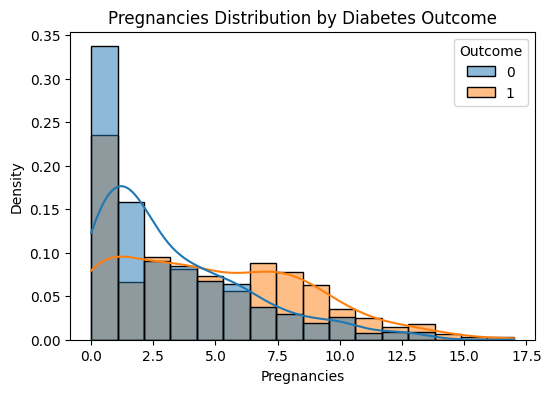

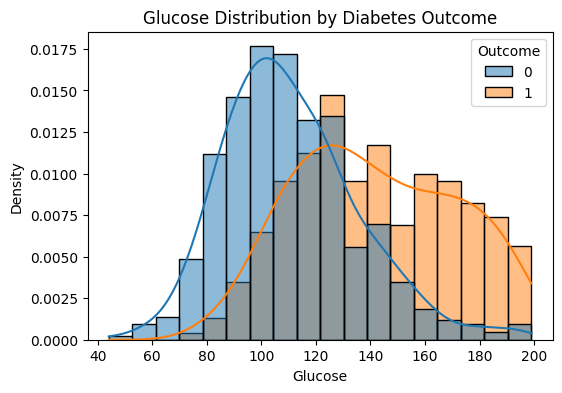

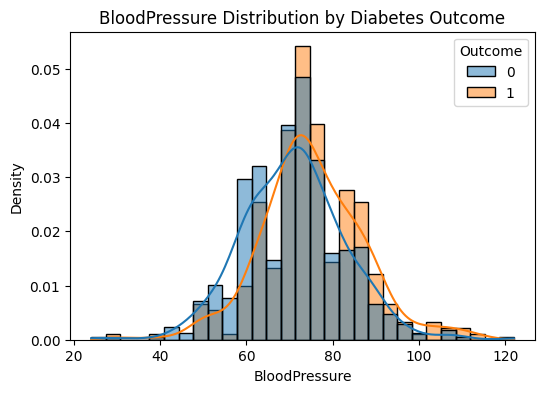

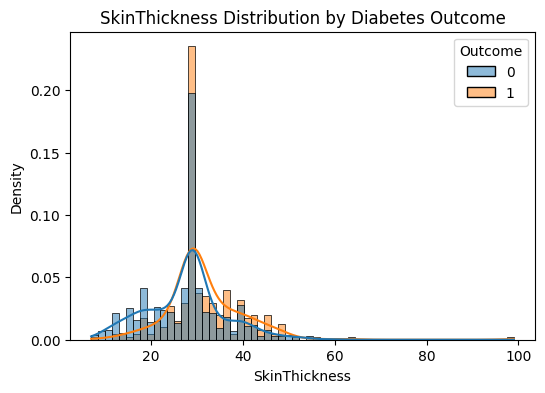

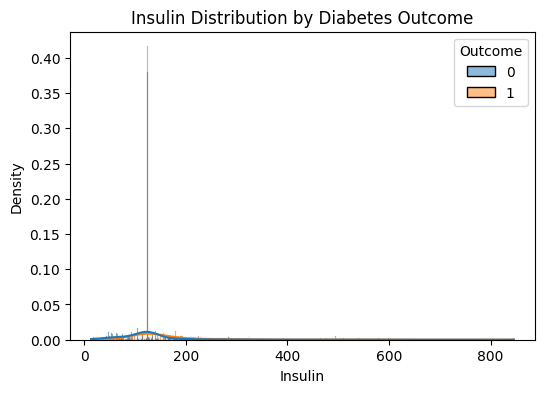

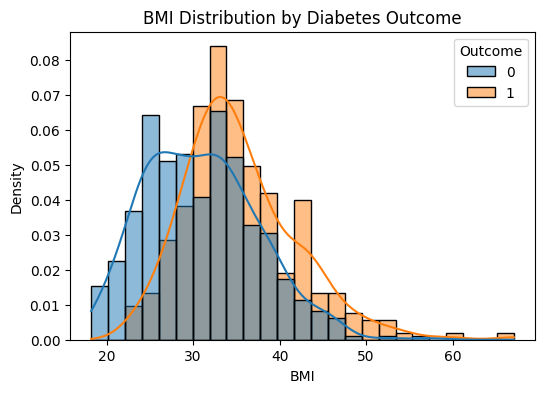

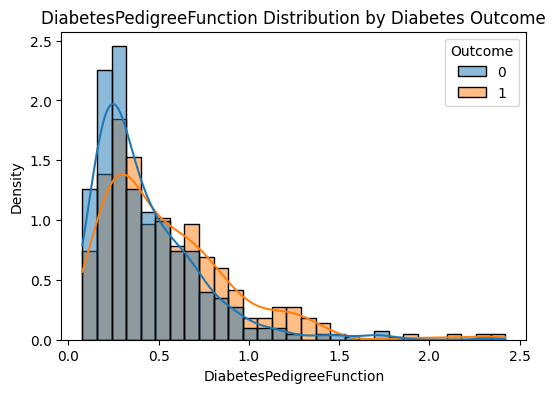

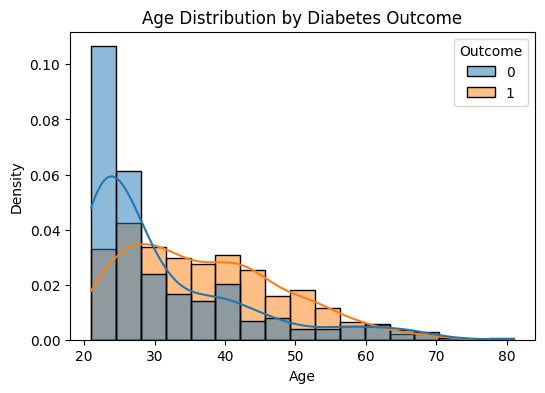

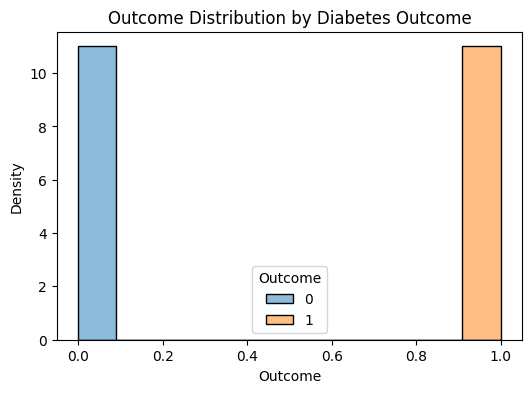

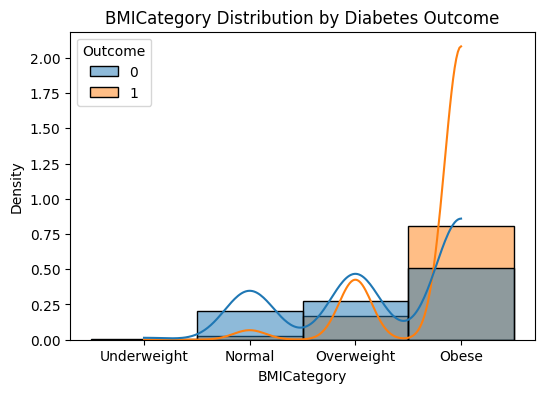

In [ ]:
# Plotting distributions of numerical features
plt.figure(figsize=(15,10))
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue="Outcome", kde=True, stat="density", common_norm=False)
    plt.title(f"{col} Distribution by Diabetes Outcome")
    plt.show()

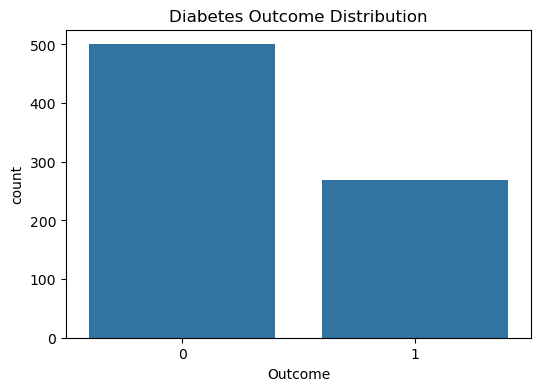

In [ ]:
# Outcome distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.show()

### Bivariate Analysis

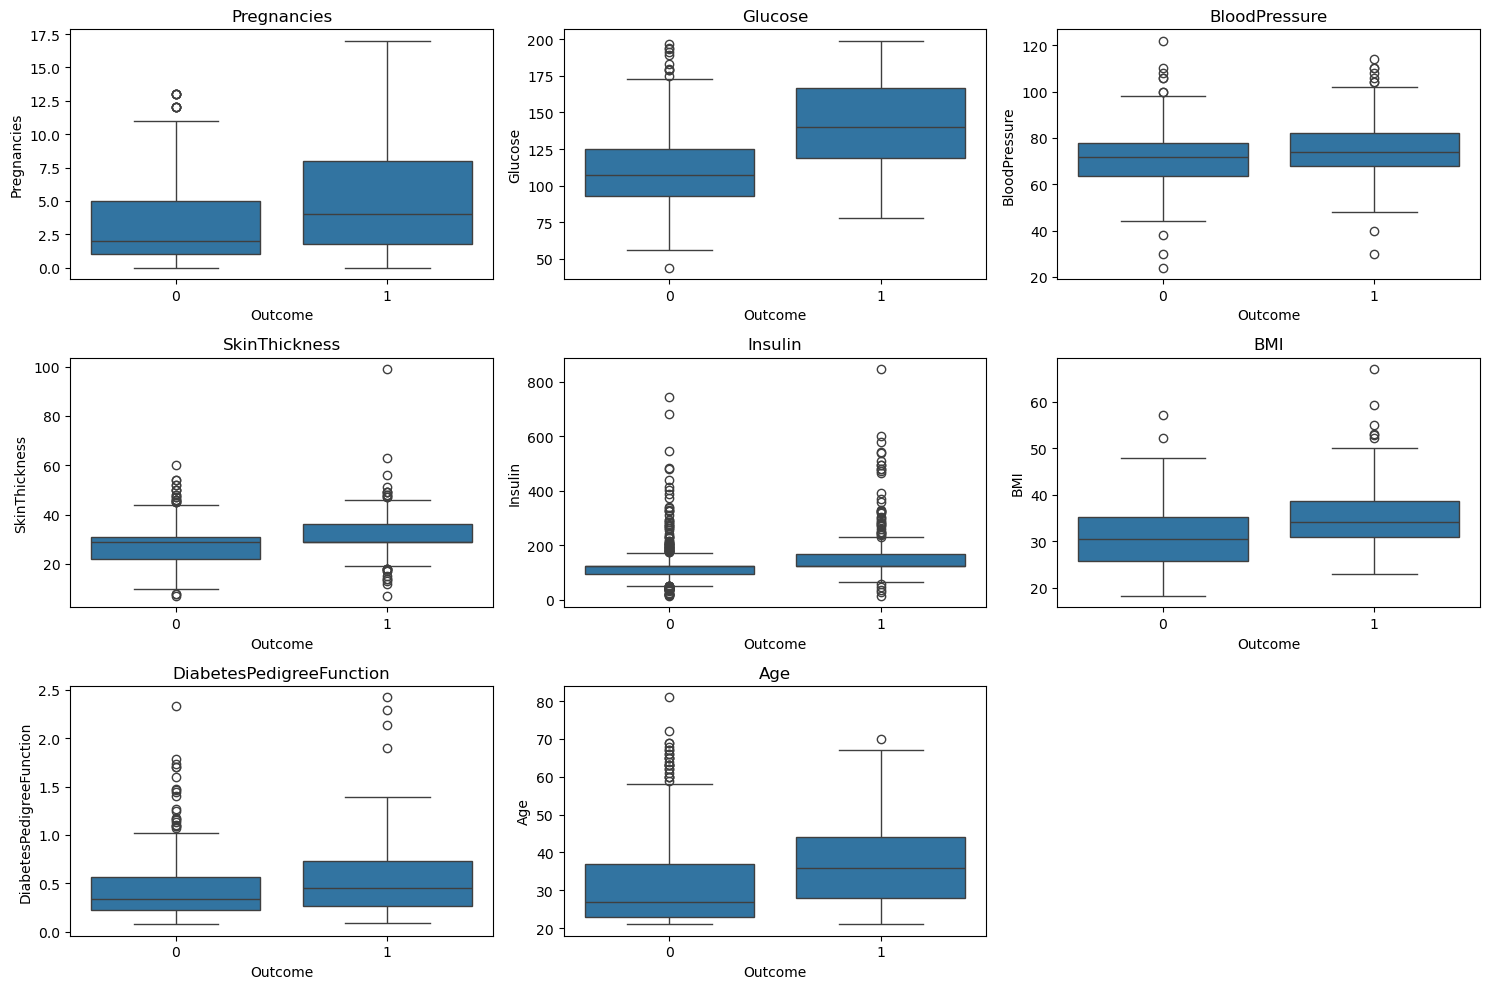

In [ ]:
# Comparing distributions for diabetic vs non-diabetic patients
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

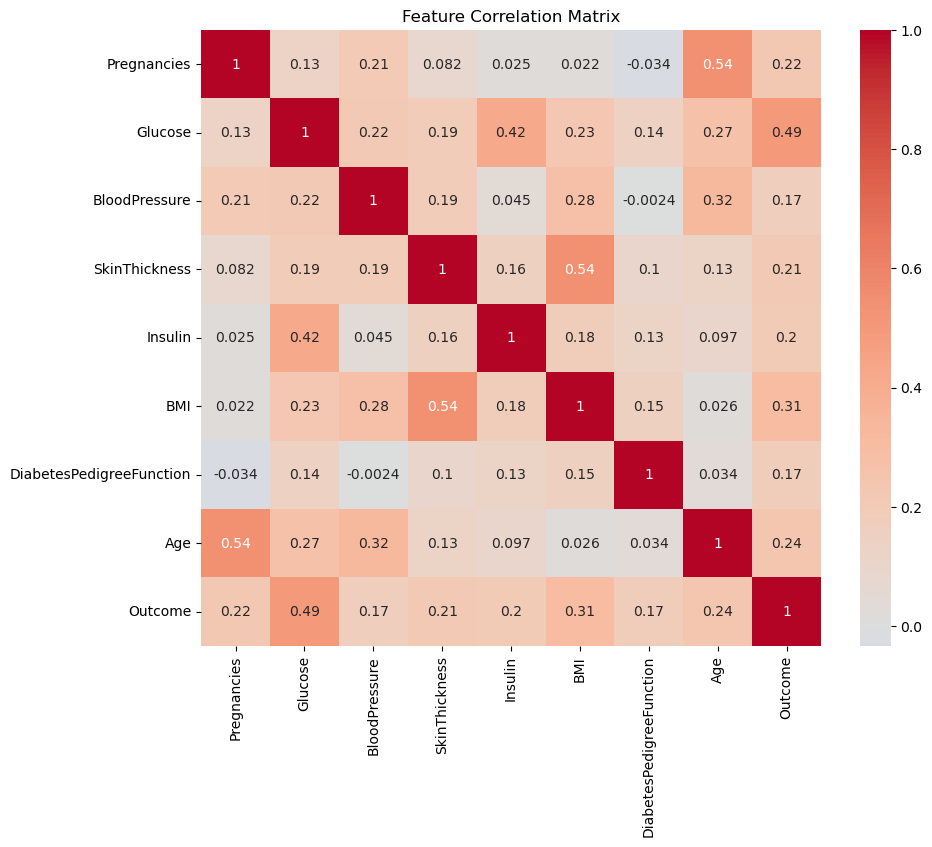

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Pair plot by Diabetes

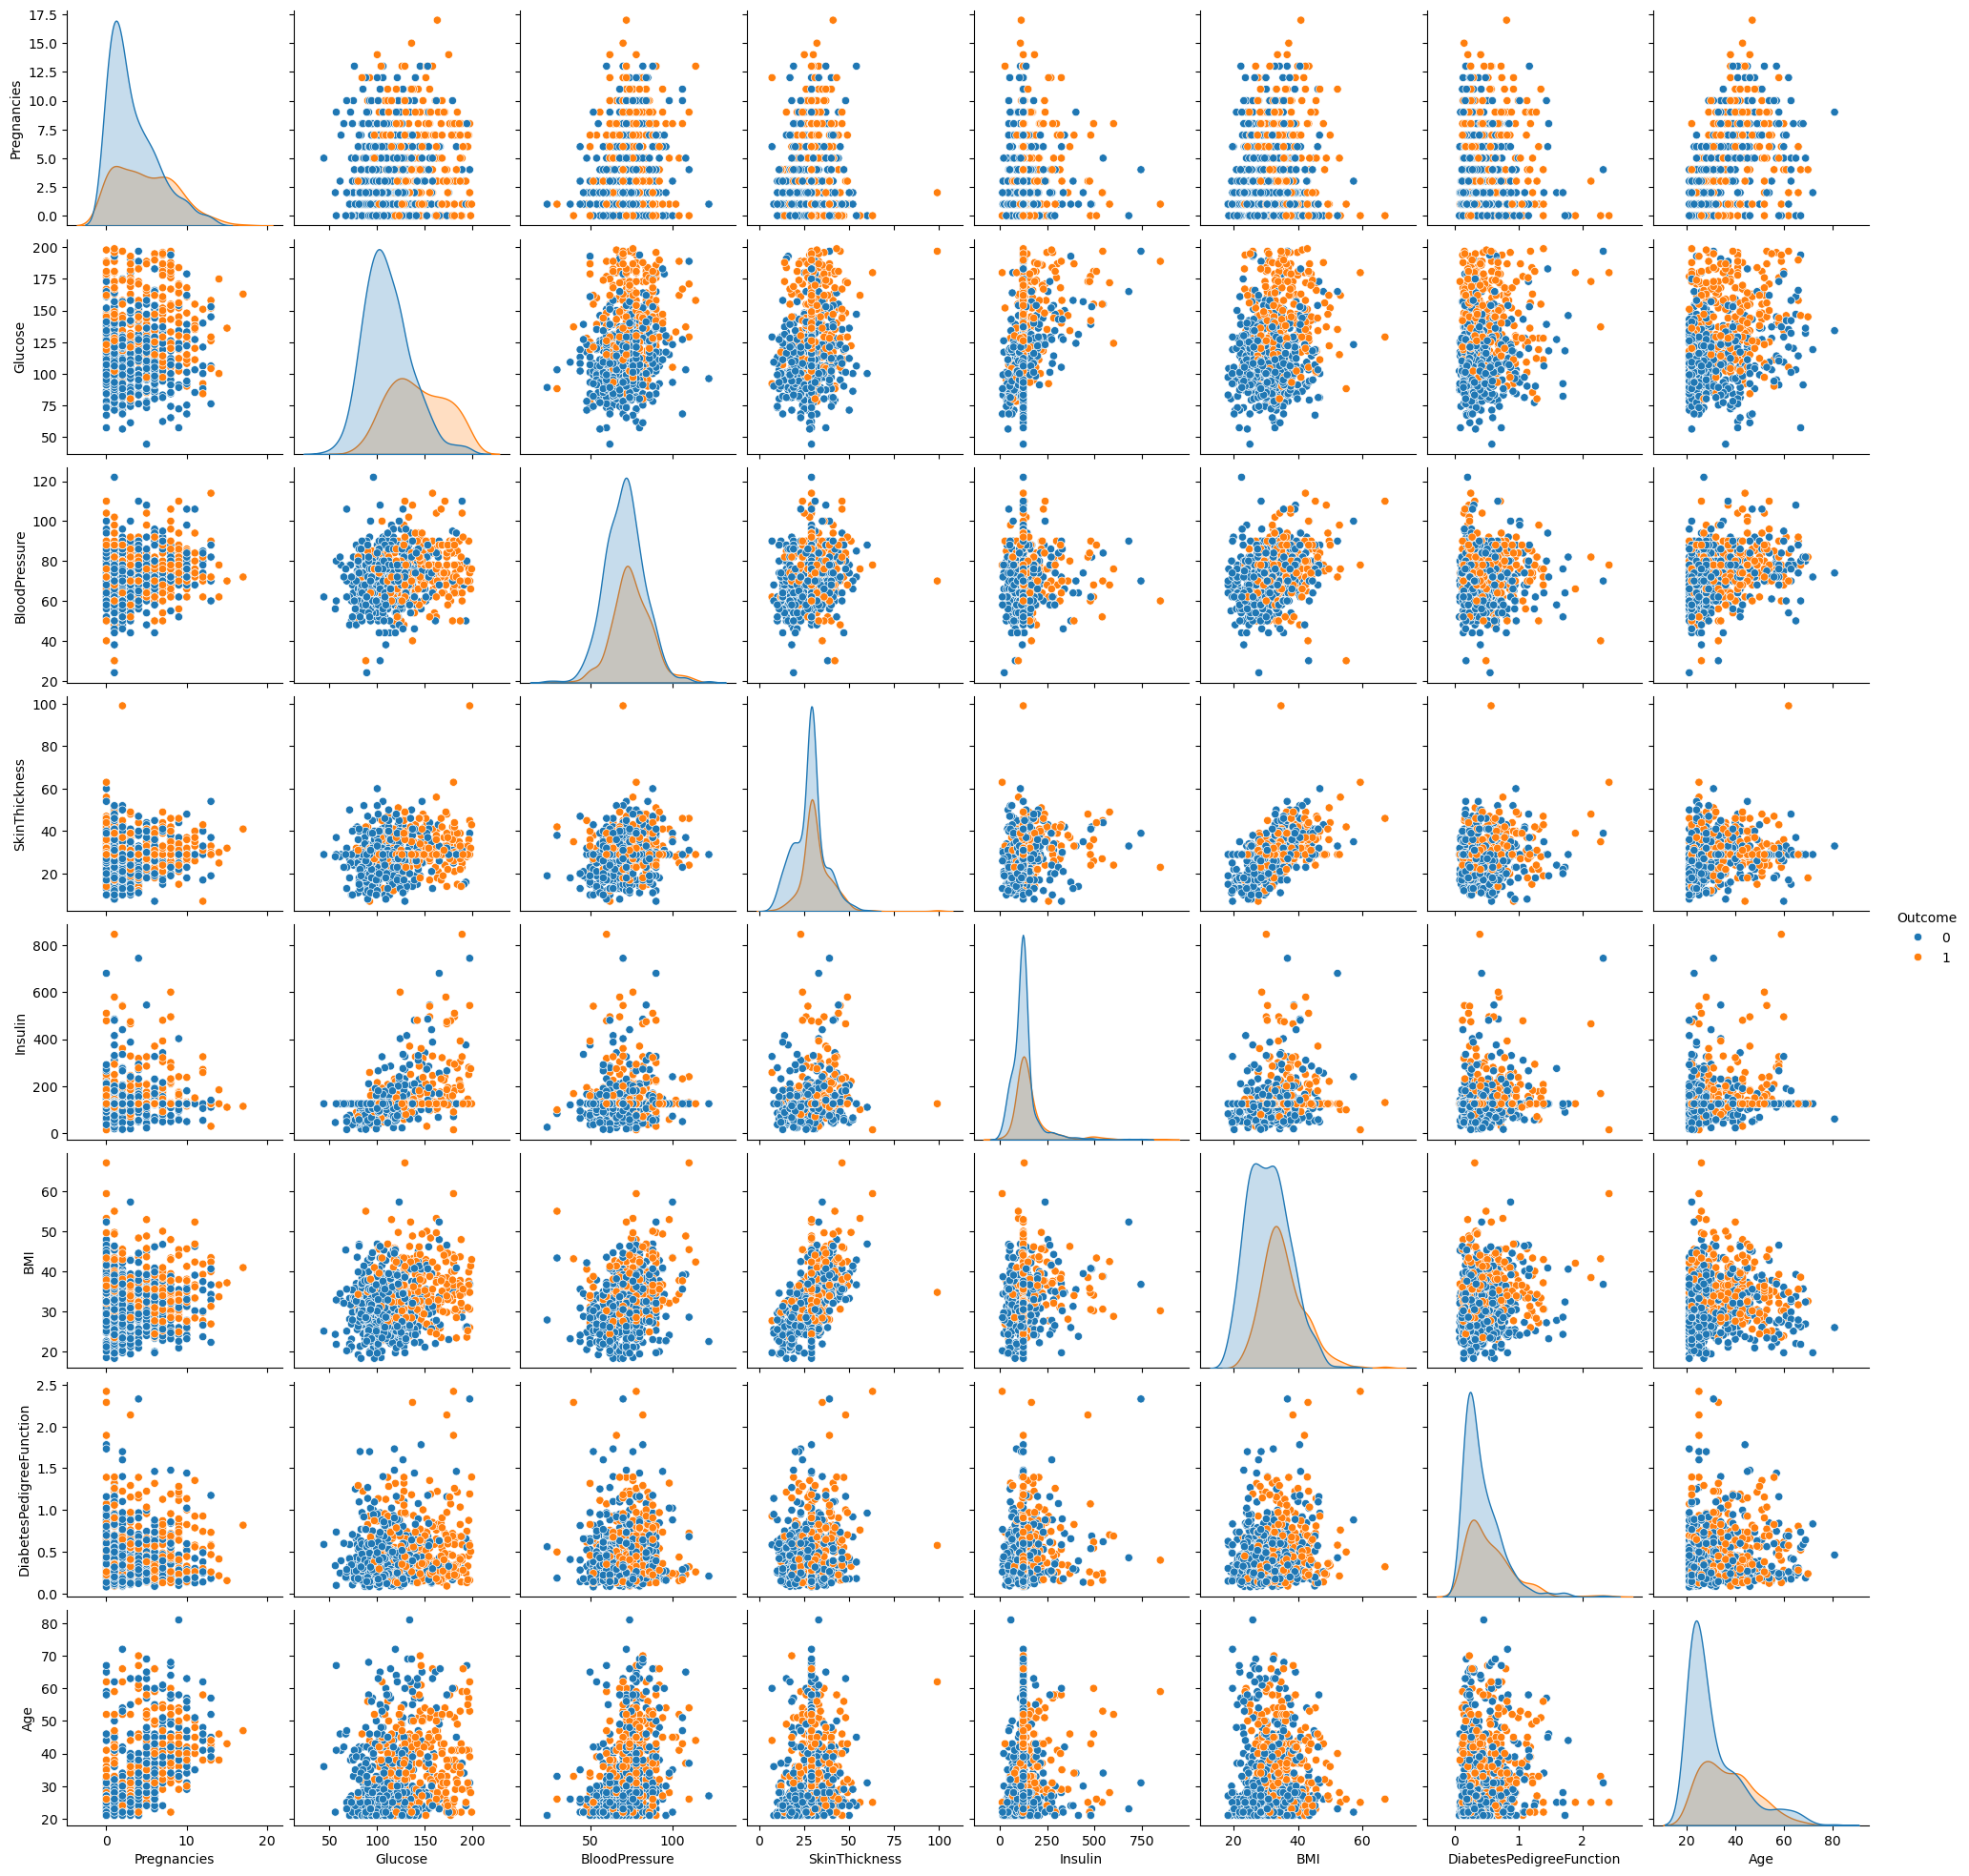

In [ ]:
sns.pairplot(df, hue='Outcome')
plt.show()

### Key EDA Findings:
1. **Glucose Levels**: Diabetic patients have significantly higher glucose levels (median ~140 vs ~110)
2. **BMI**: Higher BMI correlates with higher diabetes risk (median ~35 vs ~30)
3. **Age**: Older patients are more likely to have diabetes
4. **Insulin**: Diabetic patients show more variability in insulin levels
5. **Pregnancies**: Women with more pregnancies have higher diabetes risk
6. **Diabetes Pedigree Function**: Higher values correlate with diabetes

## Feature Engineering

In [ ]:
# Creating Age Group

def age_group(age):
    if age <= 35:
        return 'Young'
    elif age <= 50:
        return 'Middle_Aged'
    else:
        return 'Older'

df['Age_Group'] = df['Age'].apply(age_group)
df = pd.get_dummies(df, columns=['Age_Group'], prefix='Age')

In [ ]:
# Creating Glucose to Insulin Ratio (avoid dividing by 0)

df['Glucose_Insulin_Ratio'] = df['Glucose'] / df['Insulin'].replace(0, 1e-6)
df['Glucose_Insulin_Ratio']

,Glucose_Insulin_Ratio
0,1.480000e+08
1,8.500000e+07
2,1.830000e+08
3,9.468085e-01
4,8.154762e-01
...,...
763,5.611111e-01
764,1.220000e+08
765,1.080357e+00
766,1.260000e+08


In [ ]:
# Diabetes Pedigree Function Squared

df['DiabetesPedigree_Squared'] = df['DiabetesPedigreeFunction'] ** 2
df['DiabetesPedigree_Squared']

,DiabetesPedigree_Squared
0,0.393129
1,0.123201
2,0.451584
3,0.027889
4,5.234944
...,...
763,0.029241
764,0.115600
765,0.060025
766,0.121801


In [ ]:
# Blood Pressure Status

def bp_status(bp):
    if bp < 80:
        return 'Normal'
    elif bp < 90:
        return 'Prehypertension'
    else:
        return 'Hypertension'

df['BP_Status'] = df['BloodPressure'].apply(bp_status)
df = pd.get_dummies(df, columns=['BP_Status'], prefix='BP')

In [ ]:
# Interaction Term (Glucose * BMI)

df['Glucose_BMI_Interaction'] = df['Glucose'] * df['BMI']
df['Glucose_BMI_Interaction']

,Glucose_BMI_Interaction
0,4972.8
1,2261.0
2,4263.9
3,2500.9
4,5904.7
...,...
763,3322.9
764,4489.6
765,3170.2
766,3792.6


In [ ]:
# Creating BMI Category

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)
df = pd.get_dummies(df, columns=['BMI_Category'], prefix='BMI')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Middle_Aged,Age_Older,Age_Young,Glucose_Insulin_Ratio,DiabetesPedigree_Squared,BP_Hypertension,BP_Normal,BP_Prehypertension,Glucose_BMI_Interaction,BMI_Normal,BMI_Obese,BMI_Overweight,BMI_Underweight
0,6,148,72,35,0,33.6,0.627,50,1,True,False,False,1.480000e+08,0.393129,False,True,False,4972.8,False,True,False,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,8.500000e+07,0.123201,False,True,False,2261.0,False,False,True,False
2,8,183,64,0,0,23.3,0.672,32,1,False,False,True,1.830000e+08,0.451584,False,True,False,4263.9,True,False,False,False
3,1,89,66,23,94,28.1,0.167,21,0,False,False,True,9.468085e-01,0.027889,False,True,False,2500.9,False,False,True,False
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,8.154762e-01,5.234944,False,True,False,5904.7,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,False,True,False,5.611111e-01,0.029241,False,True,False,3322.9,False,True,False,False
764,2,122,70,27,0,36.8,0.340,27,0,False,False,True,1.220000e+08,0.115600,False,True,False,4489.6,False,True,False,False
765,5,121,72,23,112,26.2,0.245,30,0,False,False,True,1.080357e+00,0.060025,False,True,False,3170.2,False,False,True,False
766,1,126,60,0,0,30.1,0.349,47,1,True,False,False,1.260000e+08,0.121801,False,True,False,3792.6,False,True,False,False


## Model Building

In [ ]:
### Data Preparation

# Separate features and target
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_Middle_Aged,Age_Older,Age_Young,Glucose_Insulin_Ratio,DiabetesPedigree_Squared,BP_Hypertension,BP_Normal,BP_Prehypertension,BP_Hypertension,BP_Normal,BP_Prehypertension,BMI_Normal,BMI_Obese,BMI_Overweight,BMI_Underweight
0,6,148,72,35,0,33.6,0.627,50,True,False,False,1.480000e+08,0.393129,False,True,False,False,True,False,False,True,False,False
1,1,85,66,29,0,26.6,0.351,31,False,False,True,8.500000e+07,0.123201,False,True,False,False,True,False,False,False,True,False
2,8,183,64,0,0,23.3,0.672,32,False,False,True,1.830000e+08,0.451584,False,True,False,False,True,False,True,False,False,False
3,1,89,66,23,94,28.1,0.167,21,False,False,True,9.468085e-01,0.027889,False,True,False,False,True,False,False,False,True,False
4,0,137,40,35,168,43.1,2.288,33,False,False,True,8.154762e-01,5.234944,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False,True,False,5.611111e-01,0.029241,False,True,False,False,True,False,False,True,False,False
764,2,122,70,27,0,36.8,0.340,27,False,False,True,1.220000e+08,0.115600,False,True,False,False,True,False,False,True,False,False
765,5,121,72,23,112,26.2,0.245,30,False,False,True,1.080357e+00,0.060025,False,True,False,False,True,False,False,False,True,False
766,1,126,60,0,0,30.1,0.349,47,True,False,False,1.260000e+08,0.121801,False,True,False,False,True,False,False,True,False,False


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
# Feature scaling
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [ ]:
scaledX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)

### Model Training and Evaluation

In [ ]:
# Initializing models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
    }

In [ ]:
# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    # Storing results
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'classification_report': classification_report(y_test, y_pred)
    }

In [ ]:
# Displaying results
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {result['accuracy']:.3f}")
    print(f"ROC AUC: {result['roc_auc']:.3f}")
    print("\nClassification Report:")
    print(result['classification_report'])


Logistic Regression Results:
Accuracy: 0.760
ROC AUC: 0.808

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


Random Forest Results:
Accuracy: 0.760
ROC AUC: 0.812

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

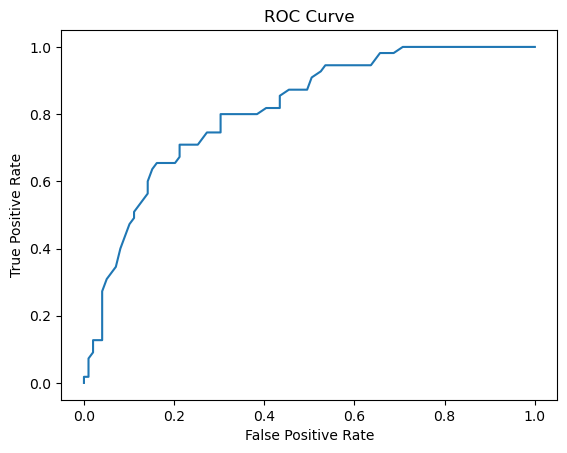

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Hyperparameter Tuning

In [ ]:
# for Logistic regression
#Defining the hyperparameter grid
param_grid = {
 'C': [0.1, 1, 50],
 'penalty': ['l1', 'l2'],
 'max_iter': [500, 1000, 2000, 3000, 4000]
}

In [ ]:
# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

In [ ]:
# Performing hyperparameter tuning
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 50],
                         'max_iter': [500, 1000, 2000, 3000, 4000],
                         'penalty': ['l1', 'l2']})

In [ ]:
# Getting best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Evaluating best model on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba),
report = classification_report(y_test, y_pred)

In [ ]:
# Displaying the results
# Displaying the results
print("\nOptimized Logistic Regression Performance:")
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC: {roc_auc[0]:.3f}")
print("Classification Report:\n", report)


Optimized Logistic Regression Performance:
Best Parameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2'}
Accuracy: 0.734
ROC AUC: 0.807
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [ ]:
#For random forest
# Defining hyperparameter grid
param_grid = {
 'n_estimators': [100, 200, 300],
 'max_depth': [None, 5, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# Initializing RandomForestClassifier and GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [ ]:
# Performing hyperparameter tuning
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Getting best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Evaluating best model on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba),
report = classification_report(y_test, y_pred)

In [ ]:
# Displaying the results
print("\nOptimized Random Forest Performance:")
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC: {roc_auc[0]:.3f}")
print("Classification Report:\n", report)


Optimized Random Forest Performance:
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.792
ROC AUC: 0.828
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        99
           1       0.71      0.71      0.71        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
# For Xgboost
# Defining hyperparameter grid
param_grid = {
 'max_depth': [3, 5, 7],
 'learning_rate': [0.1, 0.5, 1],
 'n_estimators': [50, 100, 200],
 'gamma': [0, 0.5, 1],
 'subsample': [0.5, 0.8, 1],
 'colsample_bytree': [0.5, 0.8, 1]
}

In [ ]:
# Initializing XGBClassifier and GridSearchCV
xgb = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)

In [ ]:
# Performing hyperparameter tuning
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.8, 1],
                         'gamma': [0, 0.5, 1], 'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.8, 1]})

In [ ]:
# Getting best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Evaluating best model on test set
y_pred = best_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_proba),
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Displaying results
print("\nOptimized XGBOOST Performance:")
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC: {roc_auc[0]:.3f}")
print("Classification Report:\n", report)


Optimized XGBOOST Performance:
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1}
Accuracy: 0.734
ROC AUC: 0.757
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



# cross validation

In [ ]:
scores = cross_val_score(boost, X_train, y_train, cv=5, scoring='roc_auc')

In [ ]:
boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=7, ...)

## Model Interpretation

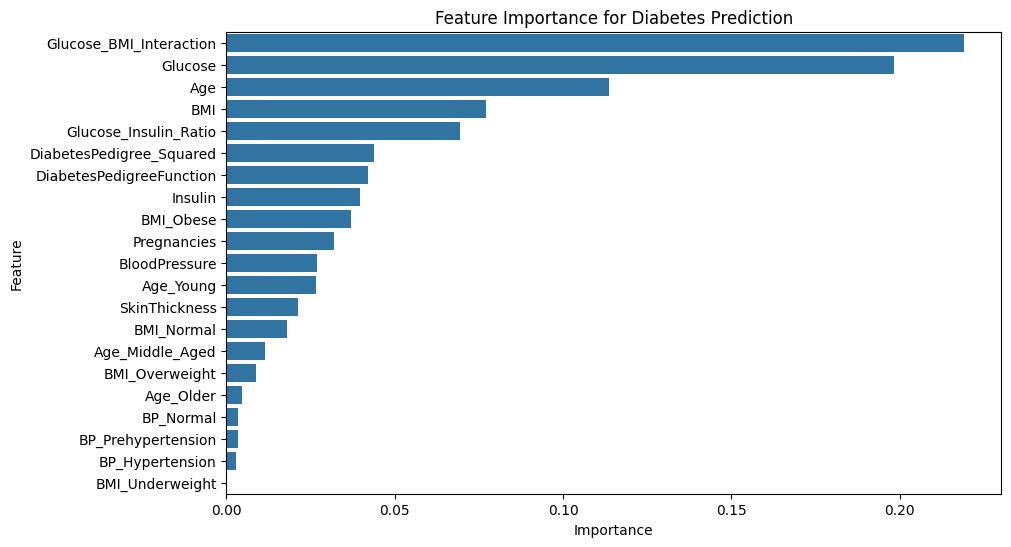

In [ ]:
# Computing the Feature importance for Random Forest
feature_importance = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Diabetes Prediction')
plt.show()

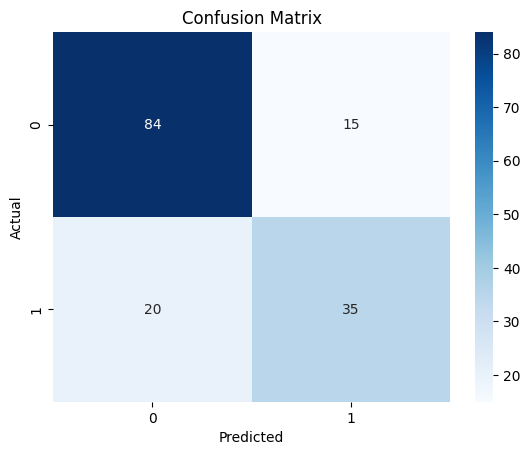

In [ ]:
# Computing the Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross validation

In [ ]:
# Defining Random Forest model
model = RandomForestClassifier(n_estimators=100)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print accuracy scores
print("Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())

Accuracy Scores: [0.75324675 0.72727273 0.77922078 0.80392157 0.73856209]
Average Accuracy: 0.7604447839741958


## Results and Findings

### Model Performance:
1. **Random Forest (Optimized)**:
   - Accuracy: 0.792
   - ROC AUC: 0.828
   - Precision (for diabetes): 0.71
   - Recall (for diabetes): 0.71

2. **Top Features**:
   - Glucose_BMI_interaction
   - Glucose level (most significant predictor)
   - BMI
   - Age
   - Diabetes Pedigree Function

### Key Insights:
1. **Glucose_BMI_interaction**:The strongest predictor of diabetes (importance score > 0.25)
2. **Glucose Levels**: The second most strongest and single best predictor of diabetes (importance score ~ 0.25)
3. **BMI**: Obesity (BMI > 30) strongly correlates with diabetes risk
4. **Age**: Risk increases significantly after age 40
5. **Pregnancies**: Women with 5+ pregnancies have higher risk
6. **Insulin**: Abnormal insulin levels are important indicators

### Recommendations

1. **Early Screening**: Patients with glucose levels > 140 should be prioritized for screening
2. **Lifestyle Interventions**: Weight management programs for patients with BMI > 30
3. **Age-Based Monitoring**: Regular check-ups for patients over 40
4. **Pregnancy Follow-up**: Additional monitoring for women with multiple pregnancies